<a href="https://colab.research.google.com/github/shannonyanes/IS4487/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [71]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
from matplotlib import pyplot as plt
from datetime import datetime

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [72]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


In [73]:
#look at the top rows
df.head(10)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
5,51319,2021-07-09,2021-07,Troy Rodriguez,South Brendamouth,OHIO,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
6,51357,2021-07-11,2021-07,Natalie Phillips,Rachelburgh,ALABAMA,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
7,51371,2021-07-12,2021-07,Dalton Mitchell,Michaeltown,VIRGINIA,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
8,51424,2021-07-15,2021-07,Timothy James,West Pamela,NEW YORK,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
9,51452,2021-07-17,2021-07,Fernando Scott,East Maureenbury,SOUTH DAKOTA,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [74]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [75]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [76]:
dfclean = df.dropna()

adding total amount

In [77]:
dfclean['total_amount'] = (df['product_price']*df['quantity'])
dfclean.head()

<ipython-input-77-44b4645edb9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['total_amount'] = (df['product_price']*df['quantity'])


,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99


removing Outliers

In [78]:
dfclean = df[(df['quantity'] < 500) & (df['product_price'] < 800)]

In [79]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40979 entries, 0 to 53945
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          40979 non-null  int64  
 1   order_date        40953 non-null  object 
 2   order_year_month  40953 non-null  object 
 3   customer_name     40979 non-null  object 
 4   city              40609 non-null  object 
 5   state_province    40609 non-null  object 
 6   quantity          40979 non-null  float64
 7   product_name      40979 non-null  object 
 8   product_line      40979 non-null  object 
 9   product_price     40979 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 3.4+ MB


In [80]:
dfclean.describe()

,order_id,quantity,product_price
count,40979.000000,40979.000000,40979.000000
mean,62479.922717,1.658972,221.060461
std,6821.926792,1.161736,288.479921
min,45080.000000,1.000000,2.290000
25%,56614.000000,1.000000,4.990000
50%,62464.000000,2.000000,21.490000
75%,68307.500000,2.000000,548.770000
max,74147.000000,200.000000,792.680000


Changing Datetime to date time

In [81]:
dfclean['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

<ipython-input-81-71579fe41753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


In [82]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40979 entries, 0 to 53945
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          40979 non-null  int64         
 1   order_date        40912 non-null  datetime64[ns]
 2   order_year_month  40953 non-null  object        
 3   customer_name     40979 non-null  object        
 4   city              40609 non-null  object        
 5   state_province    40609 non-null  object        
 6   quantity          40979 non-null  float64       
 7   product_name      40979 non-null  object        
 8   product_line      40979 non-null  object        
 9   product_price     40979 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 3.4+ MB


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

*each row is a sale...so how many sales*

In [83]:
##Count of Product to find tota number of sales

In [84]:
total_sales=dfclean['order_id'].value_counts()

In [85]:
#bar chart

In [86]:
totalsalesbyday = dfclean.groupby("order_date")["order_id"].count().sort_values(ascending=False).head(10)

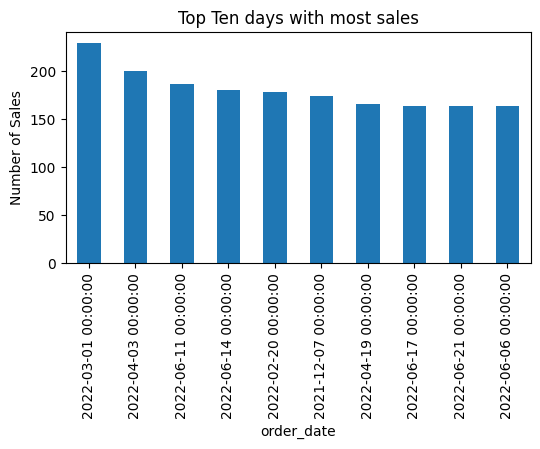

In [87]:
fig,axs = plt.subplots(1,1, figsize=(6,3))
totalsalesbyday.plot(kind='bar', ax=axs)
axs.set_title('Top Ten days with most sales')
axs.set_ylabel("Number of Sales")
plt.show()


In [88]:
#histogram

Do with product price instead

In [89]:
totalsalesbyquantity= dfclean.groupby("quantity")["order_id"].count()

<Axes: title={'center': 'Price Distribution'}, ylabel='Frequency'>

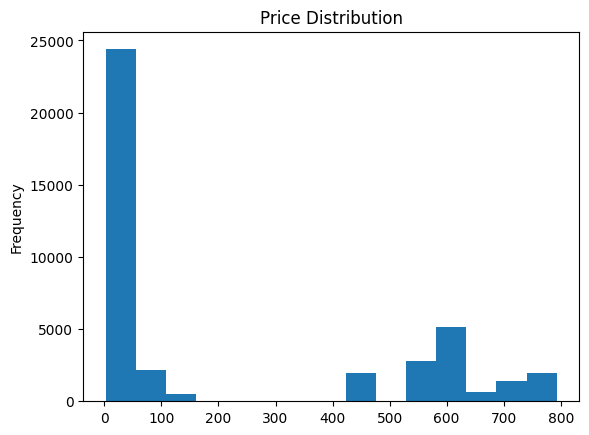

In [100]:
dfclean['product_price'].plot.hist(bins=15,title='Price Distribution')

In [91]:
#box plot

<Axes: title={'center': 'Avg Price of Product'}, ylabel='Dollars'>

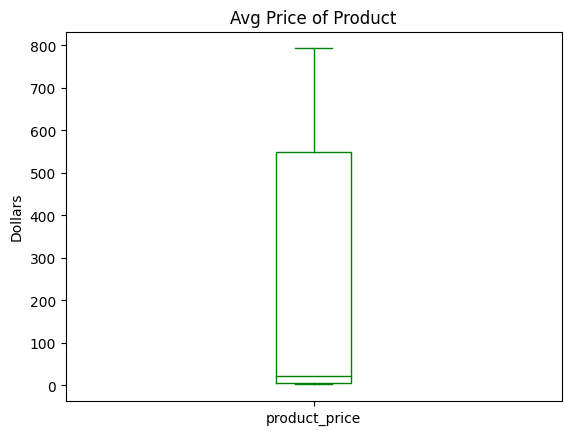

In [92]:
dfclean['product_price'].plot.box(color ='green', ylabel = 'Dollars', title = 'Avg Price of Product')

In [93]:
#scatter plot

<Axes: xlabel='product_price', ylabel='quantity'>

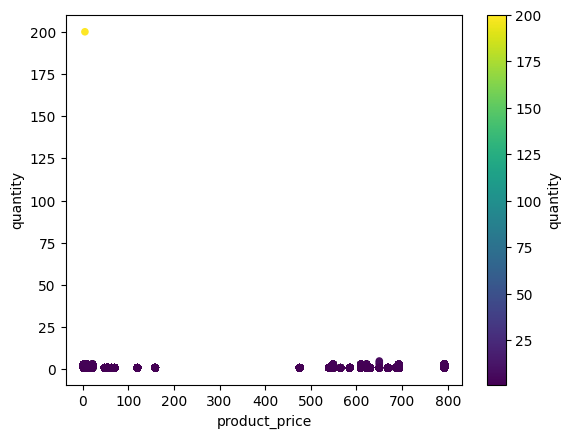

In [94]:
dfclean.plot.scatter(x='product_price',y='quantity',c='quantity')

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [95]:
#month of year

In [125]:
dfclean["month"] = dfclean["order_date"].dt.month

<ipython-input-125-c5eb47550c34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean["month"] = dfclean["order_date"].dt.month


In [126]:
totalsalesbymonth = dfclean.groupby('month')['order_id'].count()

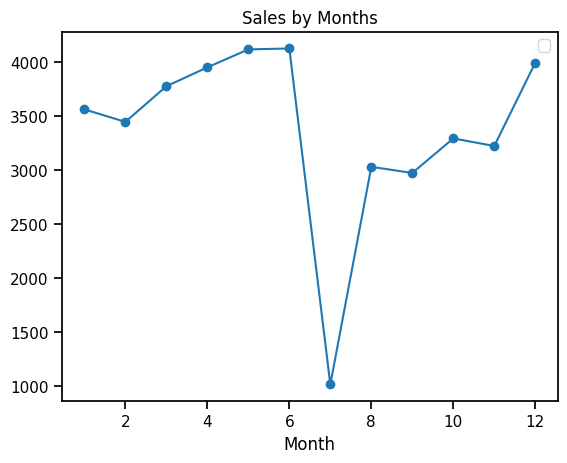

In [127]:
fig, axs = plt.subplots(1,1)
plt.plot(totalsalesbymonth, label='', marker = 'o')


plt.title('Sales by Months')
plt.xlabel('Month')



axs.legend()


plt.show()

In [96]:
#sales by state

In [97]:
totalsalesbystate = dfclean.groupby("state_province")["order_id"].count().sort_values(ascending=False).head(10)

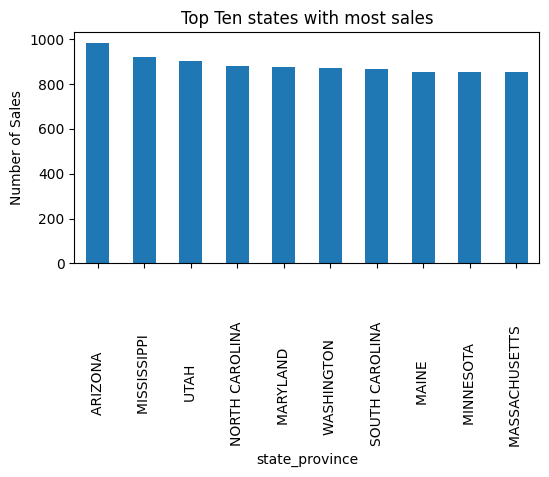

In [110]:
fig,axs = plt.subplots(1,1, figsize=(6,3))
totalsalesbystate.plot(kind='bar', ax=axs)
axs.set_title('Top Ten states with most sales')
axs.set_ylabel("Number of Sales")
plt.show()

In [98]:
#sales by product

In [115]:
totalsalesbyproduct = dfclean.groupby("product_name")["order_id"].count().sort_values(ascending=False).tail(10)

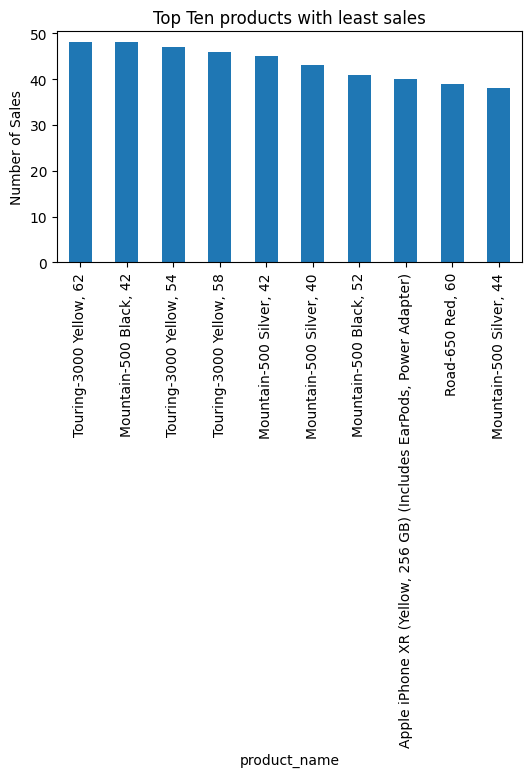

In [117]:
fig,axs = plt.subplots(1,1, figsize=(6,3))
totalsalesbyproduct.plot(kind='bar', ax=axs)
axs.set_title('Top Ten products with least sales')
axs.set_ylabel("Number of Sales")
plt.show()

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

In [99]:
#pair plot

In [123]:
print(df.columns)

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price'],
      dtype='object')


In [128]:
import seaborn as sns


In [134]:
dfclean['total_sales'] = len(dfclean)


<ipython-input-134-17f86cc679f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['total_sales'] = len(dfclean)


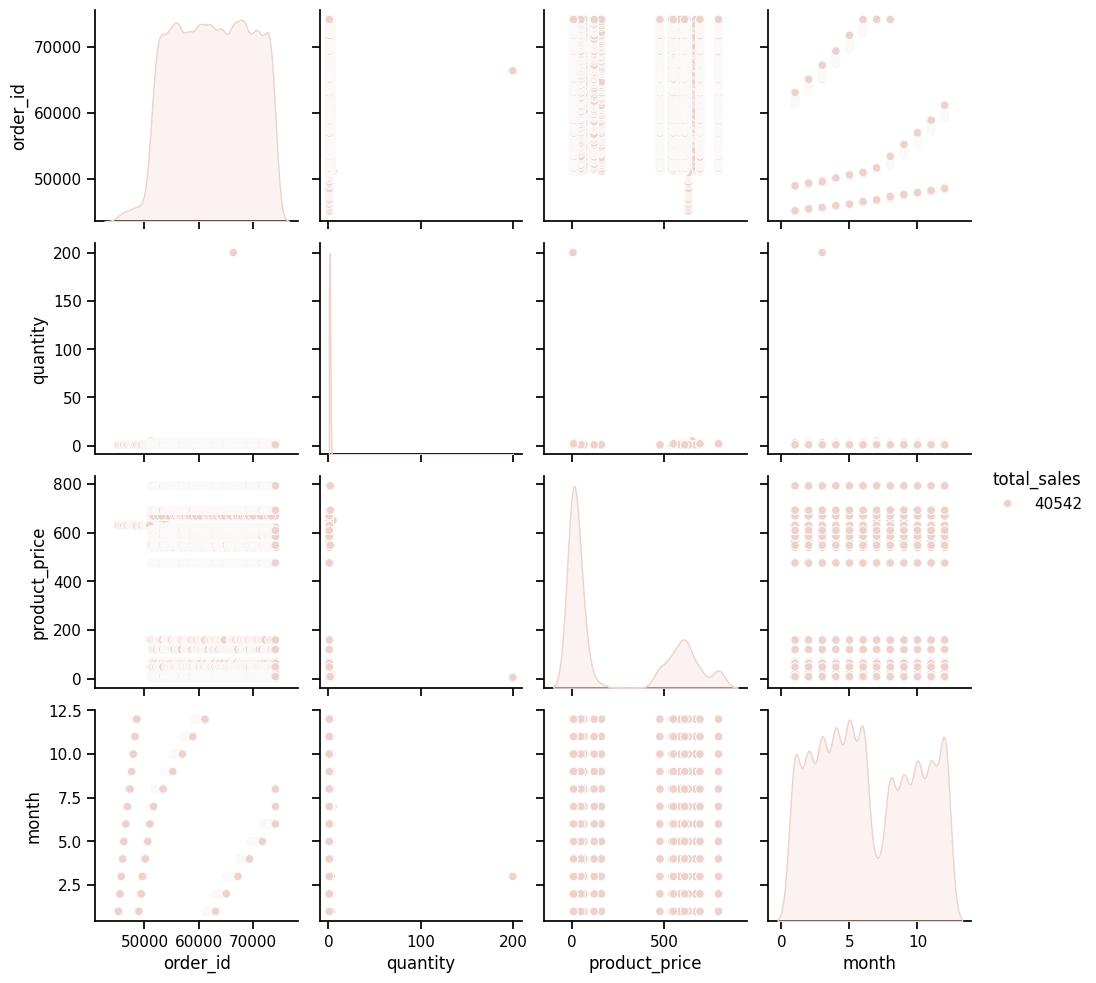

In [137]:

sns.pairplot(dfclean, hue="total_sales")